# **Breast cancer prediction**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np

# Data Inspection

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
print("Feature data (X):")
print(cancer.data)

print("\nTarget labels (y):")
print(cancer.target)

print("\nFeature names:")
print(cancer.feature_names)


Feature data (X):
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

Target labels (y):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 

In [ ]:
print("\nDataset description:")
print(cancer.DESCR)


Dataset description:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance

**Data Characteristics:**
The dataset contains features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe various characteristics of the cell nuclei present in the image.

**Overview of the Dataset:**

Number of Instances: 569
Number of Attributes: 30 numeric, predictive attributes (features) along with a class label (target).
Class Distribution:
212 instances of Malignant tumors.
357 instances of Benign tumors.

Features:
There are 30 numeric features that are derived from the following characteristics:


1.   Radius (mean of distances from the center to points on the perimeter)
2.   Texture (standard deviation of gray-scale values)
3.   Perimeter
4.   Area
5.   Smoothness (local variation in radius lengths)
6.   Compactness (perimeter² / area - 1.0)
7.   Concavity (severity of concave portions of the contour)
8.   Concave Points (number of concave portions of the contour)
9.   Symmetry
10.  Fractal Dimension ("coastline approximation" - 1)



For each of these characteristics, the mean, standard error, and the "worst" (or largest) value were calculated, leading to 30 features.

Target Labels:
The target labels indicate the diagnosis:


*   Malignant (WDBC-Malignant)
*   Benign (WDBC-Benign)




# **Exploratory data analysis (EDA)**

Plotting the first two features (e.g., mean radius vs. mean texture) in a scatter plot helps  to visually inspect whether there’s any separation or clustering that could suggest a distinction between the classes (malignant vs. benign).


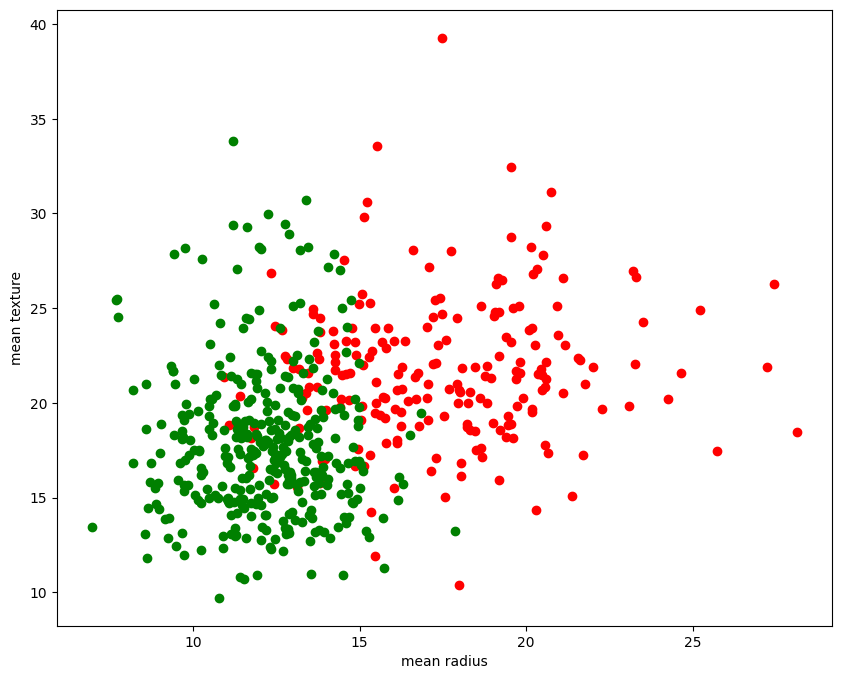

In [ ]:
X = []
for target in range(2):
    X.append([[], []])
    for i in range(len(cancer.data)):              # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture

colours = ("r", "g")   # r: malignant, :g benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()


 **explanation of code**

X= []` - This line initializes an empty list.

The `for` loop after is making nested lists using the features from the cancer dataset, by classification. 'X' is a list of lists, where the first list corresponds to the data for malignant tumors, and the second list is for benign tumors.



Each list contains two lists: one for the mean radius, and another for the mean texture of the tumors.

`colours=("r","b")` - Defines a tuple with two colours, red for malignant tumors and green for benign tumors.

`fig = plt.figure(figsize=(10,8))` - Initializes a new figure for plotting and sets the size of the figure to 10x8 inches.

`ax = fig.add_subplot(111)` - This line of code is adding a subplot to the current figure. The three integers (1, 1, 1) describe the position of the subplot - first is the number of rows, the second is the number of columns, and the third is the index of the current subplot.The next `for` loop is used to plot the mean radius versus the mean texture for malignant and benign tumors in different colors (red and blue respectively).

`ax.set_xlabel("mean radius")` and `ax.set_ylabel("mean texture")` - These two lines label the x and y axes of the plot.

`plt.show()` - This line will show the entire figure with the subplot you added.

#**Discussion of outcome**

This visualization helps to intuitively understand how these two features contribute to the separation between benign and malignant tumors. If there is a clear separation, it might suggest that these features are good predictors.

From this scatter plot,  as the tumor grows in radius and increases in texture, the more likely  it would be  diagnosed as malignant.

There seem to be some overlapping in the middle, so it would be wise to check the rest of the features.



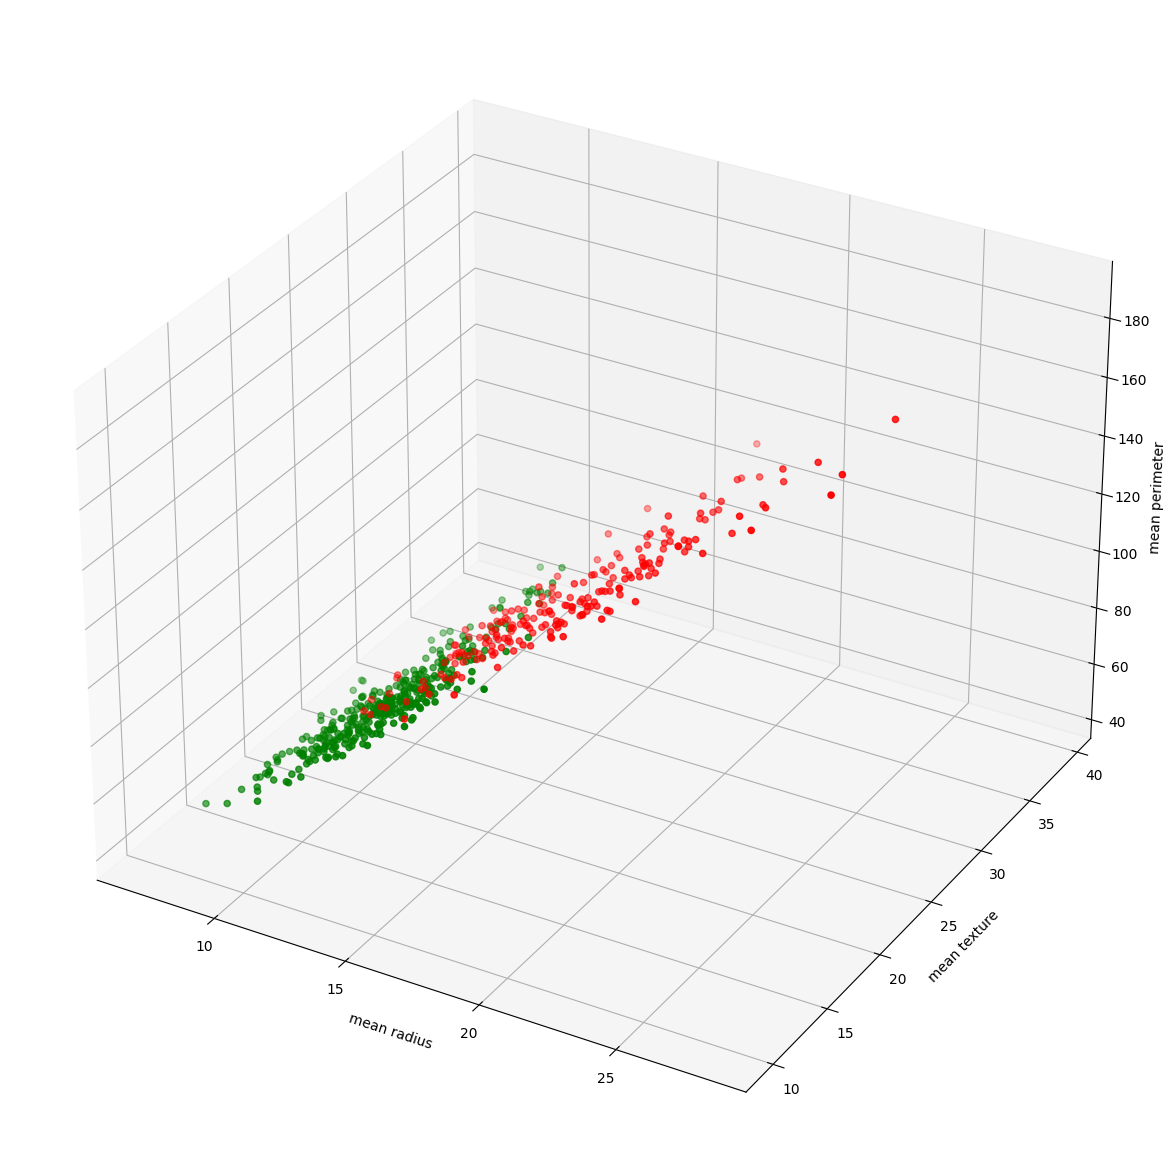

In [ ]:
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)):    # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # mean radius
            X[target][1].append(cancer.data[i][1]) # mean texture
            X[target][2].append(cancer.data[i][2]) # mean perimeter

colours = ("r", "g")
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               X[target][2],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

#**Discussion of outcome**


This 3D visualization helps  understand that these three features together provide strong signals for distinguishing between malignant and benign tumors.
There is a clear trend where as the values of mean radius, mean texture, and mean perimeter increase, the likelihood of the tumor being malignant increases.This implies that including these features in *κείμενο σε πλάγια γραφή* logistic regression model should improve its accuracy.

<ipython-input-11-063b49304e7d>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,


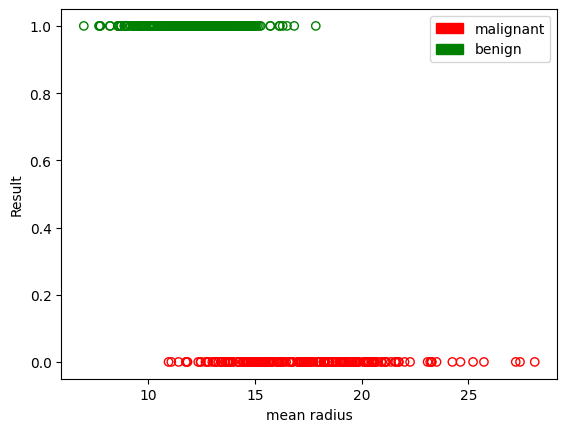

In [ ]:
x = cancer.data[:,0]            # mean radius
y = cancer.target               # 0: malignant, 1: benign
colors = {0:'red', 1:'green'}    # 0: malignant, 1: benign

plt.scatter(x,y,
            facecolors='none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            cmap=colors)

plt.xlabel("mean radius")
plt.ylabel("Result")

red   = mpatches.Patch(color='red',   label='malignant')
green  = mpatches.Patch(color='green',  label='benign')

plt.legend(handles=[red, green], loc=1)

 **explanation of code**

`%matplotlib inline` outputs the plot directly below the code cell and stores the plot in the notebook itself.

x = cancer.data[:,0]` and `y = cancer.target` take the mean radius values (first column of the dataset) as `x` and the diagnosis result (malignant or benign) as `y`.- The `colors` dictionary maps the diagnosis result to a color: malignant to red and benign to blue.- `plt.scatter(x,y,...)` creates a scatter plot with x as `x` and y as `y`. The lambda function is used to map colors to corresponding points in the plot.

- `plt.xlabel('mean radius')` and `plt.ylabel('Result')` label the x-axis and y-axis respectively.

- `red = mpatches.Patch(color='red', label='malignant')` and `blue = mpatches.Patch(color='blue', label='benign')` create legend patches with appropriate colors and labels.

- `plt.legend(handles=[red, blue], loc=1)` adds the legend to the graph at an appropriate location. In this case, '1' represents the upper-right corner.



#**Discussion of outcome**

This plot is a visual representation of how the feature "mean radius" correlates with the target variable (malignant vs. benign) in the context of breast cancer prediction.

In the y axes A value of 0.0 indicates a malignant tumor (cancerous).

A value of 1.0 indicates a benign tumor (non-cancerous).

**Separation Between Classes:**
The plot shows a distinct separation between benign (green) and malignant (red) cases based on the mean radius.
Benign cases (green) are mostly clustered in the lower range of mean radius values, typically below 15, while malignant cases (red) are more spread out across higher mean radius values, often above 15.
This clear separation indicates that the mean radius is a strong feature for distinguishing between malignant and benign tumors.

**Linear Separability:**
This plot suggests that the data points are linearly separable along the mean radius axis. Logistic regression, which is a linear classifier, would likely perform well because it can use this feature to draw a boundary (a threshold value of mean radius) to classify the tumors as malignant or benign.
The model could, for example, predict that tumors with a mean radius above a certain threshold are more likely to be malignant, while those below are likely benign.

**Feature Significance:**
The plot highlights that the mean radius is a highly informative feature for predicting breast cancer. The separation between the two classes suggests that the logistic regression model can use this feature effectively to make predictions.

# Feature correlation

It's usefull to see what kind of relationship all the features have with the target, in order to choose which of these will be selected to provide better performance for the model. Bellow is the correlation matrix.

 Correlation coefficients range from -1 to 1, where:

-1 indicates a perfect negative correlation (as one variable increases, the other decreases).

1 indicates a perfect positive correlation (as one variable increases, the other also increases).

0 indicates no correlation.


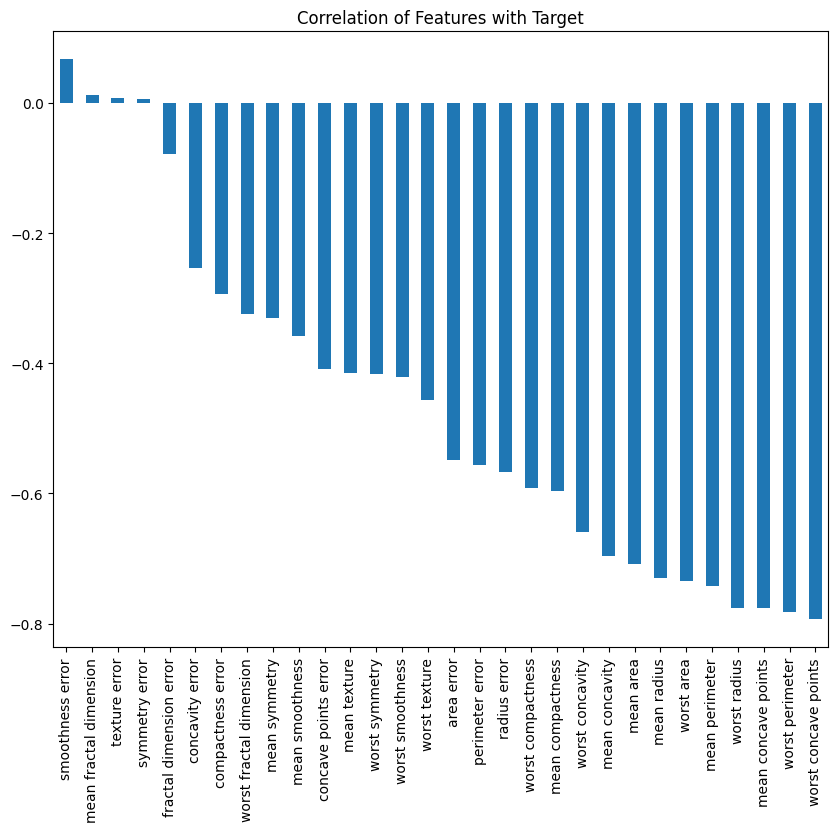

In [ ]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

# Calculate the correlation matrix
correlation_matrix = X.corrwith(y)

# Plot the correlation values
plt.figure(figsize=(10, 8))
correlation_matrix.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Target')
plt.show()

#**Discussion of outcome**


**Highly Negatively Correlated Features:**

The features on the right side of the plot with high negative correlation coefficients (close to -1) are strongly associated with malignancy. As these feature values increase, the likelihood of the tumor being malignant also increases.

Examples:
Worst Concave Points, Mean Perimeter, Mean Area, Mean Radius

These features are the most predictive of a tumor being **malignant**.

**Weakly or Positively Correlated Features:**

Features closer to zero or slightly positive on the left side of the plot have a weaker or no clear linear relationship with the target.

Examples: Smoothness Error, Mean Fractal Dimension

These features may not be as useful for predicting the outcome and could potentially be considered for exclusion or given less weight in the model.

**Feature Selection:**
Features with strong negative correlations are valuable predictors in distinguishing malignant from benign tumors. For instance, features related to tumor size and shape (like mean radius, mean area, worst perimeter) are critical.
Features with correlations closer to zero might be less useful. Maybe consider dropping or deprioritizing these features unless they interact meaningfully with other features.

**Dimensionality Consideration:**
While features with high absolute correlation values (either positive or negative) should be prioritized, it’s also important to consider potential multicollinearity (when two or more features are highly correlated with each other), which might reduce the model’s effectiveness.

In [ ]:
from sklearn import linear_model


log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),
                y = y)

#---print trained model intercept---
print(log_regress.intercept_)

#---print trained model coefficients---
print(log_regress.coef_)

[15.120902]
[[-1.02475609]]


 **explanation of code**
1. `from sklearn import linear_model`: This line imports the linear_model module, which contains methods for regression analysis, from the scikit-learn library.

2. `log_regress = linear_model.LogisticRegression()`: Here, an instance of the LogisticRegression class is being created, this will allow for the logistic regression model to be used.

3. `log_regress.fit(X = np.array(x).reshape(len(x),1), y = y)`: The fit function is being called on the logistic regression model to train the model. The arguments `X= np.array(x).reshape(len(x),1), y = y` represent the input features and output/target, respectively. The input features are being reshaped as the fit function takes a 2-dimensional array, so it is reshaped to have one column and as many rows as necessary.


4. `print(log_regress.intercept_)`: This line prints the value of the intercept of the logistic regression model. The intercept is the point where the function intercepts the y-axis.


5. `print(log_regress.coef_)`: This line is printing the coefficient of the logistic regression model. Coefficients represent the relationship between the feature(s) and the target variable. Specifically, in logistic regression, the coefficient represents the change in log odds for each unit increase in the feature variable. For example, here, for each unit increase in the feature variable 'x', the log odds decrease by 0.54291739.In terminologies of the logistic regression equation (`ln(p/1-p) = a + bx` where p is the probability of the positive class), intercept is 'a' and coefficient is 'b'.

#**Discussion of outcome**
The logistic regression model is being trained **exclusively on one feature "mean radius"**.

Sometimes, starting with a single feature helps to build an intuitive understanding of how individual features impact the model's predictions. This is particularly useful in the initial stages of model development, since it's simple and interpretable.

**Coefficient Interpretation:**


 The model learns a relationship between this single feature and the target variable (malignant vs. benign),suggesting that the  mean radius  is negatively correlated with the probability of the tumor being benign. Higher values of mean radius increase the likelihood of the tumor being malignant.

**Intercept (15.120902):** This value shifts the logistic function left or right along the x-axis. A higher intercept would shift the curve towards the left, meaning higher probabilities of class 1 (benign) for lower values of the feature.

**Coefficient (-1.02475609):** This value indicates the strength and direction of the relationship between the feature and the log-odds of the target variable.
A negative coefficient means that as the feature increases, the log-odds (and thus the probability) of the target being 1 (benign) decreases.
In simpler terms, as the value of x increases, the likelihood of the tumor being benign decreases, implying a higher likelihood of it being malignant.


While this approach is useful for understanding how a single feature correlates with the target, it doesn't take advantage of the other 29 features available in the dataset, which might contain valuable information for making more accurate predictions.

<ipython-input-14-4f581435b080>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, facecolors='none', edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),cmap=colors)


Text(0, 0.5, 'Probability')

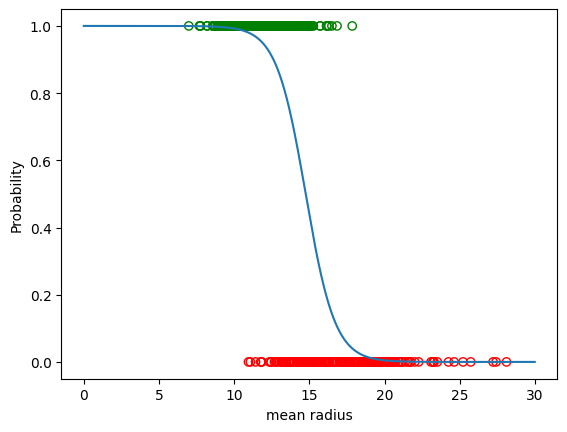

In [ ]:
def sigmoid(x):
      return (1 / (1 + np.exp(-(log_regress.intercept_[0] + (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.scatter(x,y, facecolors='none', edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),cmap=colors)

plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

 **explanation of code**

def sigmoid(x): `return (1 / (1 + np.exp(-(log_regress.intercept_[0] + (log_regress.coef_[0][0] * x)))))`a sigmoid function is defined. The sigmoid function maps any real number into the range (0, 1), making it useful in models like logistic regression where outputs can be interpreted as probabilities.

`log_regress.intercept_[0]` and `log_regress.coef_[0][0]` are the learned parameters from a logistic regression model, with `log_regress.intercept_[0]` being the bias term and `log_regress.coef_[0][0]` being the weight of the single feature, "mean radius"

`pythonx1 = np.arange(0, 30, 0.01)y1 = [sigmoid(n) for n in x1]`` x1` is a numpy array of evenly spaced values between 0 and 30, increments of 0.01. `y1` is the corresponding array of probabilities computed by passing each value of `x1` to the sigmoid function

`pythonplt.scatter(x,y, facecolors='none', edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]), cmap=colors)` This code creates a scatter plot of data points.

The color of each point's edge is determined by the corresponding value in `cancer.target`.

Colors are assigned by the dictionary `colors`, which maps target labels to colors.`pythonplt.plot(x1,y1)plt.xlabel("mean radius")plt.ylabel("Probability")`This plots the logistic regression function (as a line plot) over the previous scatter plot.

#**Discussion of outcome**

The scatter plot shows the actual data points. Green circles (probability 1) represent benign tumors, and red circles (probability 0) represent malignant tumors as in the previous plot.
The logistic regression model tries to fit a **boundary** between these two classes based on the "mean radius."

The blue curve is the logistic regression's probability output as a function of the "mean radius." At lower values of the "mean radius" **(to the left), the probability is close to 1, indicating a higher likelihood of the tumor being benign**. As the "mean radius" increases **(moving right along the x-axis), the probability rapidly drops towards 0, indicating a higher likelihood of malignancy**.

The steep transition in the curve around a certain value of the mean radius (in this case, around 15) shows the decision boundary where the model changes its prediction from benign to malignant.  **If most of the red circles are below the curve and most of the blue circles are above the curve, this suggests that the model is performing well.**

# **Train-Test**

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                              cancer.data,               # features
                              cancer.target,             # labels
                              test_size = 0.25,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = cancer.target)  # randomize based on labels


 **explanation of code**

train_test_split performs the split using a plethora of parameters.`cancer.data` and `cancer.target` are both being passed as parameters.

`cancer.data` is assumed to be a 2D array-like structure containing the features (independent variables) of the dataset.

On the other hand, `cancer.target` is expected to be a 1D array-like structure containing the labels or outcomes (dependent variables) for each feature set in `cancer.data`.

`test_size = 0.25` means that 25% of the data will be used for the test set, and the remainder (75%) will be used for the training set.

`random_state = 1` is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices.

The way it works is that if we don't provide the `random_state` parameter, every time we run the train_test_split method we will get different train and test sets, but if we provide a fixed integer value to `random_state`, it will produce the same train and test sets no matter how many times we run it. This could be extremely useful if we want reproducible results.

Finally, `stratify = cancer.target` ensures that the distribution of labels will be the same in both the training and testing sets as in the original dataset. **This can be critical in cases where the target variable distribution is uneven, as a simple random split may result in different distributions of the classes in the training and test datasets, potentially introducing bias.**

In [ ]:
from sklearn import linear_model
x = train_set[:,0:30]
y = train_labels              # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression(max_iter=2000)
log_regress.fit(X = x,
                y = y)

LogisticRegression(max_iter=2000)

 **explanation of code**

`x = train_set[:,0:30]`: This line is selecting the features from the training data. The notation `[:,0:30]` denotes that we are using all rows (":"), and columns from 0 to 30.

The result is a 2D array which is stored in the variable `x`.

3. `y = train_labels`: Here `y` is set as the output or labels of the training data. In the context of machine learning, `y` is often used to represent the "target" or the result we want our model to predict.

4. `log_regress = linear_model.LogisticRegression()`: This line creates an instance of the `LogisticRegression` class, which is a linear model for classification that predicts the probability of categorical class labels. The instance is stored in the variable `log_regress`.

5. `log_regress.fit(X = x, y = y)`: This line trains (or "fits") the model on our training data. It finds the best parameters that can map the input data `x` to the output data `y` using the logistic regression algorithm.

In [ ]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

#---assign column names to prediction---
preds_prob.columns = ["Malignant", "Benign"]

#---get the predicted class labels---
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

   Malignant    Benign  Prediction  Original Result
0   0.996465  0.003535           0                0
1   0.999821  0.000179           0                0
2   0.025879  0.974121           1                1
3   0.999985  0.000015           0                0
4   0.535315  0.464685           0                0


 **explanation of code**

1. `preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))`: Here, the `predict_proba` function generates the probabilities of the output being each class. In this case, the probabilities of the class being 'Malignant' and 'Benign'. This is done on the `test_set` data. This output is then converted into a pandas DataFrame.

2. `preds_prob.columns = ["Malignant", "Benign"]`: This line renames the columns of the probability predictions DataFrame from the default 0 and 1 to "Malignant" and "Benign".

3. `preds = log_regress.predict(X=test_set)`: Logistic Regression's `predict` function assigns a class label to each input sample, based on whether the predicted probability is above or below a certain threshold (by default, 0.5). So here, the class-label prediction for each input sample in the `test_set` is calculated and saved to `preds`.

4. `preds_class = pd.DataFrame(preds)` and `preds_class.columns = ["Prediction"]`: The predictions are converted into a DataFrame and the column name is changed to "Prediction".

5. `original_result = pd.DataFrame(test_labels)`,`original_result.columns = ["Original Result"]`: These lines convert actual labels into a DataFrame and renames the column to "Original Result".

6. `result = pd.concat([preds_prob, preds_class, original_result], axis=1)`: This merges the predicted probabilities DataFrame, the predicted class labels DataFrame, and the actual labels DataFrame into a single DataFrame along the column axis (`axis=1`).

7. `print(result.head())`: Finally, the first five rows of the combined DataFrame are printed out.

#**Discussion of outcome**

1. The model predicted a 99.65% probability that the tumor is malignant and only a 0.35% probability that it is benign. The prediction is malignant, and it matches the actual result.
2. The model predicted a 99.98% probability that the tumor is malignant and virtually no probability that it is benign. The prediction is malignant, and it is correct.
3. The model predicted a 97.41% probability that the tumor is benign and only a 2.59% probability that it is malignant. The prediction is benign, and it is correct.
4. The model predicted a 99.99% probability that the tumor is malignant and almost zero probability that it is benign. The prediction is malignant, and it is correct.
5. The model predicted a 53.53% probability that the tumor is malignant and a 46.47% probability that it is benign. The prediction is malignant, and it is correct. However, the probabilities are closer together, indicating that the model is less confident about this prediction compared to the others.

Correct Predictions: All the predictions in this output are correct (the "Prediction" column matches the "Original Result" column).

Probability Confidence: The model generally shows high confidence in its predictions (with probabilities close to 0 or 1) except for the last row, where the probabilities are closer to each other, indicating some uncertainty.

Malignant vs. Benign: The model is predicting either malignant or benign based on the higher probability, which aligns with the logistic regression's goal to output the probability that a given instance belongs to each class.


# **Confusion Matrix**

In [ ]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   3
1       5  87


A Confusion matrix can be used through various commands like crosstab or with sklearn and be vizualised with seaborn.

[[48  5]
 [ 3 87]]


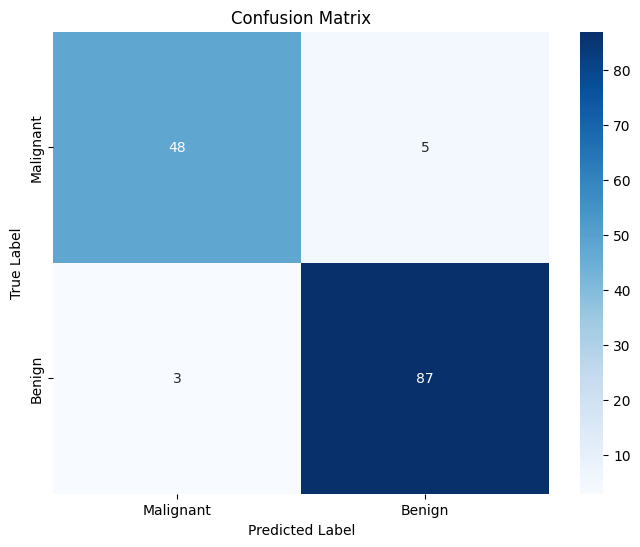

In [ ]:
from sklearn import metrics
import seaborn as sns
cm=metrics.confusion_matrix(y_true=test_labels, y_pred=preds)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#**Discussion of outcome**

1. Malignant (Class 0) is considered the positive class.
2. Benign (Class 1) is considered the negative class.

**True Positives (TP = 48):** The model correctly identified 48 malignant cases as malignant.

**False Positives (FP = 5):** The model incorrectly identified 5 benign cases as malignant.

**False Negatives (FN = 3):** The model incorrectly identified 3 malignant cases as benign.

**True Negatives (TN = 87):** The model correctly identified 87 benign cases as benign.

The main concern is the false negatives, where malignant cases are misclassified as benign. These should be minimized as much as possible in a medical context.


In [ ]:
print("---Accuracy-------------")
print(log_regress.score(X= test_set, y= test_labels))

---Accuracy-------------
0.9440559440559441


In [ ]:
print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.95      0.97      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



#**Discussion of outcome**

 The overall accuracy of the model, as previously mentioned, is 94%.

**Precision :** Class 0 (Malignant): 0.94 — Of all instances predicted as malignant, 94% were actually malignant.

Class 1 (Benign): 0.95 — Of all instances predicted as benign, 95% were actually benign.

**Recall :**
Class 0 (Malignant): 0.91 — The model correctly identified 91% of malignant cases.

Class 1 (Benign): 0.97 — The model correctly identified 97% of benign cases.

**F1-Score :**
Class 0 (Malignant): 0.92 — Balances the precision and recall for malignant cases.

Class 1 (Benign): 0.96 — Balances the precision and recall for benign cases.



**Macro Average (macro avg):** Macro average is the average of precision, recall, and F1-score across all classes, treating each class equally (without considering class imbalance).

**Weighted Average (weighted avg):** Weighted average is the average of precision, recall, and F1-score, weighted by the number of instances in each class (considering class imbalance).
the values for both are the same because When the performance metrics for each class are very close, the impact of weighting by class support (number of instances) becomes negligible, leading to similar or identical macro and weighted averages.




#**Conclusion**

This analysis indicates that the model is quite effective in distinguishing between malignant and benign tumors, with a strong overall performance across all metrics.

Though is slightly better at identifying benign cases (Class 1) than malignant cases (Class 0), which is reflected in the slightly higher numbers seen in all metrics.This difference is influenced by the distribution of the classes in the dataset. Since the model has more benign instances to learn from, it performs better in identifying benign cases compared to malignant cases.







